# 每月期望值統計資料

In [58]:
import pandas as pd
import numpy as np

sheetName = 'all' # 交易資料 by 年份
bankruptLots = 2 * 3 # (長線口數+短線口數) * 3

dates=['2018-12','2018-11','2018-10','2018-9','2018-8','2018-7',\
       '2018-6','2018-5','2018-4','2018-3','2018-2','2018-1',\
        '2017-12','2017-11','2017-10']

df = pd.read_excel('files/data.xlsx', sheetname=sheetName)

df['Date'] = df['成交時間'].dt.year.astype(str)+'-'+df['成交時間'].dt.month.astype(str)
df['Lot'] = df['口數']
df['Balance'] = df['平倉損益']

df = df[['Date','Lot','Balance']]

datas = []
for date in reversed(dates):
    df1 = df[df['Date']==date]
    if not df1.empty:
        obj = {}
        obj['年月份'] = date
        obj['虧損口數'] = df1[df1['Balance']<0]['Lot'].sum()
        obj['獲利口數'] = df1[df1['Balance']>=0]['Lot'].sum()
        obj['總口數'] = df1['Lot'].sum()
        obj['勝率%'] = str(round((obj['獲利口數'] / obj['總口數'])*100, 1))+'%'
        obj['總虧損'] = df1[df1['Balance']<0]['Balance'].sum()
        obj['總獲利'] = df1[df1['Balance']>=0]['Balance'].sum()
        obj['淨利'] = df1['Balance'].sum()
        obj['期望值(E)'] = round((obj['淨利'] / obj['總口數']))
        obj['平均虧損'] = round(obj['總虧損'] / obj['虧損口數'],0)
        obj['平均獲利'] = round(obj['總獲利'] / obj['獲利口數'],0)
        obj['最大虧損'] = df1['Balance'].min()
        obj['最大獲利'] = df1['Balance'].max()
        datas.append(obj)

# Total        
obj ={}
obj['年月份'] = 'Total'
obj['虧損口數'] = df[df['Balance']<0]['Lot'].sum()
obj['獲利口數'] = df[df['Balance']>=0]['Lot'].sum()
obj['總口數'] = df['Lot'].sum()
obj['勝率%'] = str(round((obj['獲利口數'] / obj['總口數'])*100, 1))+'%'
obj['總虧損'] = df[df['Balance']<0]['Balance'].sum()
obj['總獲利'] = df[df['Balance']>=0]['Balance'].sum()
obj['淨利'] = df['Balance'].sum()
obj['期望值(E)'] = round((obj['淨利'] / obj['總口數']))
obj['平均虧損'] = round(obj['總虧損'] / obj['虧損口數'],0)
obj['平均獲利'] = round(obj['總獲利'] / obj['獲利口數'],0)
obj['最大虧損'] = df['Balance'].min()
obj['最大獲利'] = df['Balance'].max()
obj['期望報酬(R)'] = str(round((obj['期望值(E)'] / obj['平均虧損']) * -1,2))+'R'
obj['實現報酬(R)'] = str(round((obj['期望值(E)'] / obj['平均虧損']) * -1,2) * obj['總口數'] )+'R'
obj['破慘風險'] = str(round(((obj['平均虧損'] * bankruptLots) / obj['淨利']) * 100,1))+'%'
datas.insert(0,obj)
       
df = pd.DataFrame(datas).sort_index(ascending=False)

df[['年月份','虧損口數','獲利口數','總口數','勝率%','總虧損','總獲利','淨利','期望值(E)','平均虧損','平均獲利','最大虧損','最大獲利','期望報酬(R)','實現報酬(R)','破慘風險']]

# 交易系統關鍵：正期望值 + 交易機會 + 部位規模控制(破產風險)

# 淨利破慘風險： 
# 若連續出現平均虧損, 對淨利造成的影響, 重要!!! 連續虧損也是交易的一部份...
# 注意：破產風險淨利虧損應要低於25%最好!!

,年月份,虧損口數,獲利口數,總口數,勝率%,總虧損,總獲利,淨利,期望值(E),平均虧損,平均獲利,最大虧損,最大獲利,期望報酬(R),實現報酬(R),破慘風險
4,2018-1,1,2,3,66.7%,-120,24400,24280,8093.0,-120.0,12200.0,-120,12650,NaN,NaN,NaN
3,2017-12,9,11,20,55.0%,-14128,13961,-167,-8.0,-1570.0,1269.0,-4481,7019,NaN,NaN,NaN
2,2017-11,7,3,10,30.0%,-8674,7104,-1570,-157.0,-1239.0,2368.0,-3132,5968,NaN,NaN,NaN
1,2017-10,6,9,15,60.0%,-8090,17965,9875,658.0,-1348.0,1996.0,-2032,14069,NaN,NaN,NaN
0,Total,23,25,48,52.1%,-31012,63430,32418,675.0,-1348.0,2537.0,-4481,14069,0.5R,24.0R,-24.9%


# 每月交易統計紀錄

In [22]:
import pandas as pd
import numpy as np

dates=['2018-12','2018-11','2018-10','2018-9','2018-8','2018-7','2018-6','2018-5','2018-4','2018-3','2018-2','2018-1',\
        '2017-12','2017-11','2017-10']

df = pd.read_excel('files/data.xlsx', sheetname=sheetName)

df['Date'] = df['成交時間'].dt.year.astype(str)+'-'+df['成交時間'].dt.month.astype(str)
df['Lot'] = df['口數']
df['Balance'] = df['平倉損益']

df = df[['Date','Lot','Balance']]

datas = []
for date in reversed(dates):
    df1 = df[df['Date']==date]
    if not df1.empty:
        obj = {}
        obj['年月份'] = date
        obj['-90~60'] = df1[(df1['Balance']/df1['Lot'] >= -4500) & (df1['Balance']/df1['Lot'] < -3000)]['Lot'].sum()
        obj['-60~45'] = df1[(df1['Balance']/df1['Lot'] >= -3000) & (df1['Balance']/df1['Lot'] < -2250)]['Lot'].sum()
        obj['-45~30'] = df1[(df1['Balance']/df1['Lot'] >= -2250) & (df1['Balance']/df1['Lot'] < -1500)]['Lot'].sum()
        obj['-30~15'] = df1[(df1['Balance']/df1['Lot'] >= -1500) & (df1['Balance']/df1['Lot'] < -750)]['Lot'].sum()
        obj['-15~0'] = df1[(df1['Balance']/df1['Lot'] >= -750) & (df1['Balance']/df1['Lot'] < 0)]['Lot'].sum()
        obj['0~15'] = df1[(df1['Balance']/df1['Lot'] >= 0) & (df1['Balance']/df1['Lot'] < 750)]['Lot'].sum()
        obj['15~30'] = df1[(df1['Balance']/df1['Lot'] >= 750) & (df1['Balance']/df1['Lot'] < 1500)]['Lot'].sum()
        obj['30~45'] = df1[(df1['Balance']/df1['Lot'] >= 1500) & (df1['Balance']/df1['Lot'] < 2250)]['Lot'].sum()
        obj['45~60'] = df1[(df1['Balance']/df1['Lot'] >= 2250) & (df1['Balance']/df1['Lot'] < 3000)]['Lot'].sum()
        obj['60~90'] = df1[(df1['Balance']/df1['Lot'] >= 3000) & (df1['Balance']/df1['Lot'] < 4500)]['Lot'].sum()
        obj['90~120'] = df1[(df1['Balance']/df1['Lot'] >= 4500) & (df1['Balance']/df1['Lot'] < 6000)]['Lot'].sum()
        obj['120~150'] = df1[(df1['Balance']/df1['Lot'] >= 6000) & (df1['Balance']/df1['Lot'] < 7500)]['Lot'].sum()
        obj['150~180'] = df1[(df1['Balance']/df1['Lot'] >= 7500) & (df1['Balance']/df1['Lot'] < 9000)]['Lot'].sum()
        obj['180~210'] = df1[(df1['Balance']/df1['Lot'] >= 9000) & (df1['Balance']/df1['Lot'] < 10500)]['Lot'].sum()
        obj['210~240'] = df1[(df1['Balance']/df1['Lot'] >= 10500) & (df1['Balance']/df1['Lot'] < 12000)]['Lot'].sum()
        obj['240~270'] = df1[(df1['Balance']/df1['Lot'] >= 12000) & (df1['Balance']/df1['Lot'] < 13500)]['Lot'].sum()
        obj['270~300'] = df1[(df1['Balance']/df1['Lot'] >= 13500) & (df1['Balance']/df1['Lot'] < 15000)]['Lot'].sum()
        datas.append(obj)

# Summry All
obj = {}
obj['年月份'] = 'Total'
obj['-90~60'] = df[(df['Balance']/df['Lot'] >= -4500) & (df['Balance']/df['Lot'] < -3000)]['Lot'].sum()
obj['-60~45'] = df[(df['Balance']/df['Lot'] >= -3000) & (df['Balance']/df['Lot'] < -2250)]['Lot'].sum()
obj['-45~30'] = df[(df['Balance']/df['Lot'] >= -2250) & (df['Balance']/df['Lot'] < -1500)]['Lot'].sum()
obj['-30~15'] = df[(df['Balance']/df['Lot'] >= -1500) & (df['Balance']/df['Lot'] < -750)]['Lot'].sum()
obj['-15~0'] = df[(df['Balance']/df['Lot'] >= -750) & (df['Balance']/df['Lot'] < 0)]['Lot'].sum()
obj['0~15'] = df[(df['Balance']/df['Lot'] >= 0) & (df['Balance']/df['Lot'] < 750)]['Lot'].sum()
obj['15~30'] = df[(df['Balance']/df['Lot'] >= 750) & (df['Balance']/df['Lot'] < 1500)]['Lot'].sum()
obj['30~45'] = df[(df['Balance']/df1['Lot'] >= 1500) & (df['Balance']/df['Lot'] < 2250)]['Lot'].sum()
obj['45~60'] = df[(df['Balance']/df1['Lot'] >= 2250) & (df['Balance']/df['Lot'] < 3000)]['Lot'].sum()
obj['60~90'] = df[(df['Balance']/df['Lot'] >= 3000) & (df['Balance']/df['Lot'] < 4500)]['Lot'].sum()
obj['90~120'] = df[(df['Balance']/df['Lot'] >= 4500) & (df['Balance']/df['Lot'] < 6000)]['Lot'].sum()
obj['120~150'] = df[(df['Balance']/df['Lot'] >= 6000) & (df['Balance']/df['Lot'] < 7500)]['Lot'].sum()
obj['150~180'] = df[(df['Balance']/df['Lot'] >= 7500) & (df['Balance']/df['Lot'] < 9000)]['Lot'].sum()
obj['180~210'] = df[(df['Balance']/df['Lot'] >= 9000) & (df['Balance']/df['Lot'] < 10500)]['Lot'].sum()
obj['210~240'] = df[(df['Balance']/df['Lot'] >= 10500) & (df['Balance']/df['Lot'] < 12000)]['Lot'].sum()
obj['240~270'] = df[(df['Balance']/df['Lot'] >= 12000) & (df['Balance']/df['Lot'] < 13500)]['Lot'].sum()
obj['270~300'] = df[(df['Balance']/df['Lot'] >= 13500) & (df['Balance']/df['Lot'] < 15000)]['Lot'].sum()
datas.insert(0,obj)

        
df = pd.DataFrame(datas).sort_index(ascending=False)
df = df[['年月份','-90~60','-60~45','-45~30','-30~15','-15~0','0~15','15~30','30~45','45~60','60~90', \
         '90~120','120~150','150~180','180~210','210~240','240~270','270~300']]

df

,年月份,-90~60,-60~45,-45~30,-30~15,-15~0,0~15,15~30,30~45,45~60,60~90,90~120,120~150,150~180,180~210,210~240,240~270,270~300
3,2017-12,1,0,3,2,3,9,0,0,0,1,0,1,0,0,0,0,0
2,2017-11,1,0,2,0,4,2,0,0,0,0,1,0,0,0,0,0,0
1,2017-10,0,0,4,0,2,5,3,0,0,0,0,0,0,0,0,0,1
0,Total,2,0,9,2,9,16,3,0,0,1,1,1,0,0,0,0,1


# 交易紀錄統計長條圖

Populating the interactive namespace from numpy and matplotlib


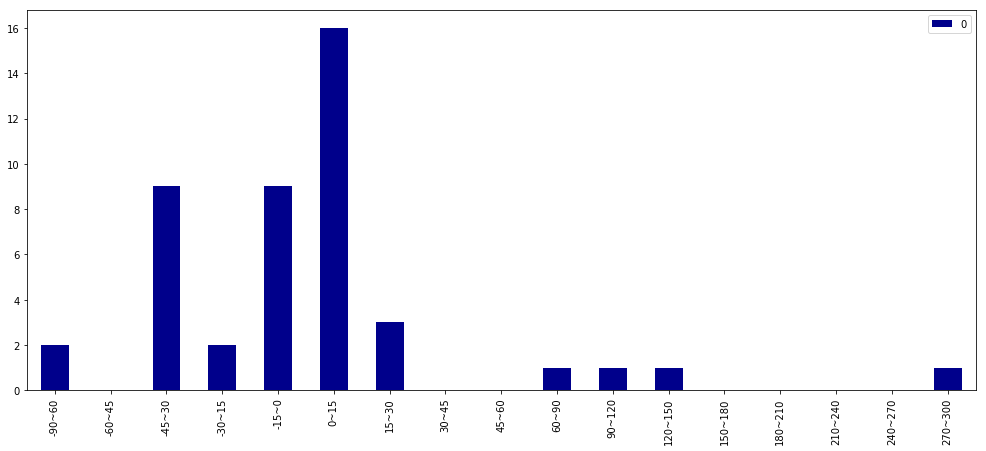

In [23]:
%pylab inline

import pandas as pd
import numpy as np

df = pd.read_excel('files/data.xlsx', sheetname=sheetName)

df['Date'] = df['成交時間'].dt.year.astype(str)+df['成交時間'].dt.month.astype(str)
df['Lot'] = df['口數']
df['Balance'] = df['平倉損益']

df = df[['Date','Lot','Balance']]

obj = {}
obj['-90~60'] = df[(df['Balance']/df['Lot'] >= -4500) & (df['Balance']/df['Lot'] < -3000)]['Lot'].sum()
obj['-60~45'] = df[(df['Balance']/df['Lot'] >= -3000) & (df['Balance']/df['Lot'] < -2250)]['Lot'].sum()
obj['-45~30'] = df[(df['Balance']/df['Lot'] >= -2250) & (df['Balance']/df['Lot'] < -1500)]['Lot'].sum()
obj['-30~15'] = df[(df['Balance']/df['Lot'] >= -1500) & (df['Balance']/df['Lot'] < -750)]['Lot'].sum()
obj['-15~0'] = df[(df['Balance']/df['Lot'] >= -750) & (df['Balance']/df['Lot'] < 0)]['Lot'].sum()
obj['0~15'] = df[(df['Balance']/df['Lot'] >= 0) & (df['Balance']/df['Lot'] < 750)]['Lot'].sum()
obj['15~30'] = df[(df['Balance']/df['Lot'] >= 750) & (df['Balance']/df['Lot'] < 1500)]['Lot'].sum()
obj['30~45'] = df[(df['Balance']/df1['Lot'] >= 1500) & (df['Balance']/df['Lot'] < 2250)]['Lot'].sum()
obj['45~60'] = df[(df['Balance']/df1['Lot'] >= 2250) & (df['Balance']/df['Lot'] < 3000)]['Lot'].sum()
obj['60~90'] = df[(df['Balance']/df['Lot'] >= 3000) & (df['Balance']/df['Lot'] < 4500)]['Lot'].sum()
obj['90~120'] = df[(df['Balance']/df['Lot'] >= 4500) & (df['Balance']/df['Lot'] < 6000)]['Lot'].sum()
obj['120~150'] = df[(df['Balance']/df['Lot'] >= 6000) & (df['Balance']/df['Lot'] < 7500)]['Lot'].sum()
obj['150~180'] = df[(df['Balance']/df['Lot'] >= 7500) & (df['Balance']/df['Lot'] < 9000)]['Lot'].sum()
obj['180~210'] = df[(df['Balance']/df['Lot'] >= 9000) & (df['Balance']/df['Lot'] < 10500)]['Lot'].sum()
obj['210~240'] = df[(df['Balance']/df['Lot'] >= 10500) & (df['Balance']/df['Lot'] < 12000)]['Lot'].sum()
obj['240~270'] = df[(df['Balance']/df['Lot'] >= 12000) & (df['Balance']/df['Lot'] < 13500)]['Lot'].sum()
obj['270~300'] = df[(df['Balance']/df['Lot'] >= 13500) & (df['Balance']/df['Lot'] < 15000)]['Lot'].sum()

df = pd.DataFrame(obj, index=[0])
df = df[['-90~60','-60~45','-45~30','-30~15','-15~0','0~15','15~30','30~45','45~60', \
         '60~90','90~120','120~150','150~180','180~210','210~240','240~270','270~300']]

df = pd.DataFrame(df.stack()[0])
df.plot(kind='bar',figsize=(17,7),color='DarkBlue') # DarkGreen, DarkOrange, DarkBlue, Gray



# End!!